<a href="https://colab.research.google.com/github/zhuyifengzju/cs391r_robosuite_tutorial/blob/main/robosuite_colab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/univ

In [2]:
pip install robosuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install numpy imageio imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Test if robosuite can be successfully import

In [23]:
import robosuite
import numpy, imageio

# Initialize environments with robosuite

In [45]:
options = {}
options["env_name"] = "Lift"
options["controller_configs"] = robosuite.load_controller_config(default_controller="OSC_POSE")
options["robots"] = "Panda"

env = robosuite.make(
    **options,
    has_renderer=False,
    has_offscreen_renderer=True,
    ignore_done=True,
    use_camera_obs=True,
    horizon=1000,
    control_freq=20,
    camera_names=["agentview", "robot0_eye_in_hand", "frontview"]
)


# Reset the environment and control the robots through API

In [49]:
obs = env.reset()

Check the image observation (Showing both agentview image and eye in hand image)


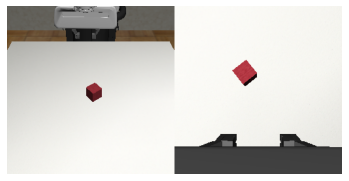

In [52]:
from matplotlib import pyplot as plt
# We need to invert the numpy array because of matplotlib visualization convention
plt.imshow(np.concatenate((obs["agentview_image"][::-1], obs["robot0_eye_in_hand_image"][::-1]), axis=1))
plt.axis("off")
plt.show()

See what an observation contains

In [48]:
print(obs.keys())

odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'cube_pos', 'cube_quat', 'gripper_to_cube_pos', 'robot0_proprio-state', 'object-state'])


Example control wth random OSC_POSE actions. Each OSC_POSE action contains 7 dimensions, 6 arm + 1 gripper

In [53]:
images = []
for _ in range(100):
  obs, reward, done, _ = env.step(np.random.randn(7))
  images.append(obs["frontview_image"][::-1])

Visualize the video

In [54]:
writer = imageio.get_writer('output.mp4', fps=20)
for image in images:
  writer.append_data(image)
writer.close()

from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)